# Visualize pathway ranking

This notebook will visualize pathway ranking obtained by the different enrichment analysis methods.

**Note**: This notebook is expecting outputs for all enrichment methods generated by the [previous notebook](2_apply_enrichment_method.ipynb)

In [1]:
%load_ext autoreload
%load_ext rpy2.ipython
%autoreload 2

import os
import pandas as pd
import numpy as np
import plotnine as pn
from IPython.display import Image, display, SVG
import svgutils.transform as sg
from lxml import etree
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from ponyo import utils

np.random.seed(123)

In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

config_filename = os.path.abspath(
    os.path.join(base_dir, "configs", "config_human_general.tsv")
)

params = utils.read_config(config_filename)

In [3]:
# Load params
dataset_name = params["dataset_name"]
project_id = params["project_id"]

In [4]:
# Create dictionary of enrichment method: statistic
method_stats_dict = {
    "GSEA": "padj",
    "GSVA": "ES",
    "CAMERA": "FDR",
    "ORA": "p.adjust"
}

## Get pathway summary data

In [5]:
# Pathway summary files
gsea_pathway_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_pathway_summary_{project_id}.tsv"
)
gsva_pathway_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_pathway_summary_{project_id}_GSVA.tsv"
)
camera_pathway_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_pathway_summary_{project_id}_CAMERA.tsv"
)
ora_pathway_summary_filename = os.path.join(
    base_dir, 
    dataset_name, 
    f"generic_pathway_summary_{project_id}_ORA.tsv"
)

In [6]:
# Pathway summary data
gsea_pathway_summary = pd.read_csv(gsea_pathway_summary_filename, sep="\t", index_col=0, header=0)
gsva_pathway_summary = pd.read_csv(gsva_pathway_summary_filename, sep="\t", index_col=0, header=0)
camera_pathway_summary = pd.read_csv(camera_pathway_summary_filename, sep="\t", index_col=0, header=0)
ora_pathway_summary = pd.read_csv(ora_pathway_summary_filename, sep="\t", index_col=0, header=0)

## Format data for plotting

In [7]:
print(gsea_pathway_summary.shape)
gsea_pathway_summary.head()

(50, 11)


,Pathway ID,Adj P-value (Real),Rank (Real),padj (Real),Median adj p-value (simulated),Rank (simulated),Percentile (simulated),Mean padj (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,,,
HALLMARK_GLYCOLYSIS,HALLMARK_GLYCOLYSIS,0.00206,49.0,0.00206,0.878788,17.5,26.966292,0.603617,0.446711,22,-1.346635
HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,0.00206,49.0,0.00206,1.000000,5.5,0.000000,0.672977,0.433540,19,-1.547532
HALLMARK_E2F_TARGETS,HALLMARK_E2F_TARGETS,0.00206,49.0,0.00206,0.878788,17.5,26.966292,0.620061,0.443817,16,-1.392469
HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INFLAMMATORY_RESPONSE,0.00280,44.0,0.00280,0.315685,38.0,73.033708,0.444122,0.436628,25,-1.010752
HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_IL2_STAT5_SIGNALING,0.00280,44.0,0.00280,1.000000,5.5,0.000000,0.645635,0.429944,25,-1.495160


In [8]:
print(gsva_pathway_summary.shape)
gsva_pathway_summary.head()

(50, 11)


,Pathway ID,Rank (Real),abs(ES) (Real),ES (Real),Median ES (simulated),Rank (simulated),Percentile (simulated),Mean abs(ES) (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,,,
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,50.0,0.209187,-0.209187,0.163631,50.0,100.000000,0.172823,0.102192,25,0.355839
HALLMARK_ANGIOGENESIS,HALLMARK_ANGIOGENESIS,49.0,0.132144,0.132144,0.069741,34.0,67.346939,0.080977,0.056531,25,0.905115
HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY,HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY,48.0,0.128857,-0.128857,0.075522,38.0,75.510204,0.075773,0.037622,25,1.410993
HALLMARK_COMPLEMENT,HALLMARK_COMPLEMENT,47.0,0.128787,-0.128787,0.053042,21.0,40.816327,0.069969,0.066880,25,0.879466
HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_INTERFERON_GAMMA_RESPONSE,46.0,0.124543,-0.124543,0.147243,49.0,97.959184,0.159338,0.102631,25,-0.339032


In [9]:
print(camera_pathway_summary.shape)
camera_pathway_summary.head()

(50, 11)


,Pathway ID,Adj P-value (Real),Rank (Real),FDR (Real),Median adj p-value (simulated),Rank (simulated),Percentile (simulated),Mean FDR (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,,,
HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,2.580185e-07,50.0,2.580185e-07,3.739628e-08,50.0,100.000000,0.000040,0.000154,25,-0.254679
HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_ALLOGRAFT_REJECTION,2.629681e-05,49.0,2.629681e-05,1.847834e-07,49.0,97.959184,0.000100,0.000418,25,-0.175510
HALLMARK_ANDROGEN_RESPONSE,HALLMARK_ANDROGEN_RESPONSE,1.082655e-04,48.0,1.082655e-04,4.272574e-06,48.0,95.918367,0.000176,0.000467,25,-0.144952
HALLMARK_ANGIOGENESIS,HALLMARK_ANGIOGENESIS,1.543327e-04,47.0,1.543327e-04,7.220993e-06,47.0,93.877551,0.000379,0.000946,25,-0.237279
HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,4.179875e-04,46.0,4.179875e-04,1.107009e-05,46.0,91.836735,0.000931,0.002421,25,-0.211686


In [10]:
print(ora_pathway_summary.shape)
ora_pathway_summary.head()

(50, 11)


,Pathway ID,Adj P-value (Real),Rank (Real),p.adjust (Real),Median adj p-value (simulated),Rank (simulated),Percentile (simulated),Mean p.adjust (simulated),Std deviation (simulated),Number of experiments (simulated),Z score
pathway,,,,,,,,,,,
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,2.239989e-11,50.0,2.239989e-11,7.565504e-01,32.0,63.265306,0.569065,0.441398,25,-1.289235
HALLMARK_KRAS_SIGNALING_DN,HALLMARK_KRAS_SIGNALING_DN,1.218074e-05,49.0,1.218074e-05,5.894007e-09,49.0,97.959184,0.183536,0.371777,25,-0.493639
HALLMARK_ESTROGEN_RESPONSE_LATE,HALLMARK_ESTROGEN_RESPONSE_LATE,1.289009e-05,47.5,1.289009e-05,1.184575e-01,42.0,83.673469,0.377954,0.422969,25,-0.893544
HALLMARK_MYOGENESIS,HALLMARK_MYOGENESIS,1.289009e-05,47.5,1.289009e-05,3.437871e-10,50.0,100.000000,0.181127,0.365131,25,-0.496026
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,1.429611e-05,46.0,1.429611e-05,2.708547e-02,44.0,87.755102,0.223919,0.346597,25,-0.646010


## Pathway ranking per enrichment method

In [11]:
# define plotting function
def plot_significance_vs_ranking(summary_df, method_name, stats_colname, x_label, output_figure_filename):
    # Format input dataframe
    plot_df = pd.DataFrame(
        data={"Test statistic": summary_df[f"Median {stats_colname} (simulated)"].values,
          "Percentile rank": summary_df["Percentile (simulated)"].values
         },
        index=summary_df.index
    )
    
    fig = pn.ggplot(plot_df, pn.aes(x='Test statistic', y='Percentile rank'))
    fig += pn.geom_point()
    fig += pn.geom_point(plot_df[plot_df['Percentile rank']>90.0],
                         pn.aes(x='Test statistic', y='Percentile rank'),
                         color='red'
                        )
    fig += pn.geom_text(pn.aes(label=
                               [x if plot_df.loc[x,'Percentile rank']>90.0 else "" for x in plot_df.index]),
                        ha='left',
                        va='top',
                        size=5
                       )
    fig += pn.labs(x = x_label,
                y = 'Genericness (percentile of ranking)',
                title = f'{method_name} pathway statistics vs ranking')
    fig += pn.theme_bw()
    fig += pn.theme(
        legend_title_align = "center",
        plot_background=pn.element_rect(fill='white'),
        legend_key=pn.element_rect(fill='white', colour='white'), 
        legend_title=pn.element_text(family='sans-serif', size=15),
        legend_text=pn.element_text(family='sans-serif', size=12),
        plot_title=pn.element_text(family='sans-serif', size=15),
        axis_text=pn.element_text(family='sans-serif', size=12),
        axis_title=pn.element_text(family='sans-serif', size=15)
        )
    
    # Save figure
    fig.save(
        output_figure_filename,
        format="svg",
        bbox_inches="tight",
        transparent=True,
        pad_inches=0,
        dpi=300,
    )
    print(fig)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: GSEA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


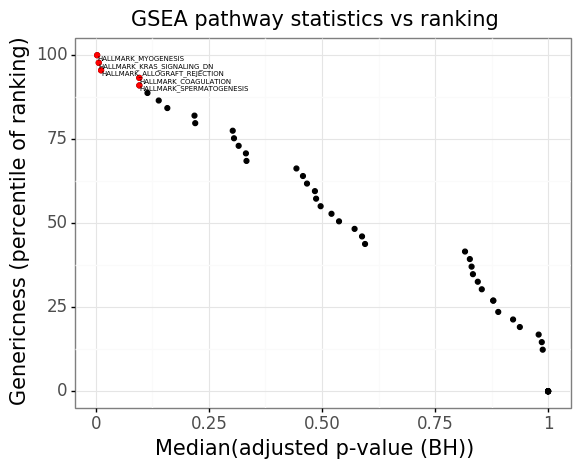

<ggplot: (8753558542077)>


In [12]:
plot_significance_vs_ranking(
    gsea_pathway_summary,
    "GSEA", 
    "adj p-value",
    "Median(adjusted p-value (BH))",
    "GSEA_pathway_ranking.svg"
)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: GSVA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


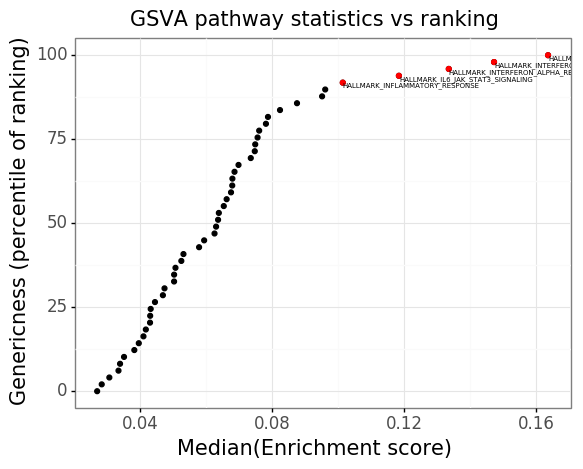

<ggplot: (8753558516925)>


In [13]:
plot_significance_vs_ranking(
    gsva_pathway_summary, 
    "GSVA",
    "ES", 
    "Median(Enrichment score)", 
    "GSVA_pathway_ranking.svg"
)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: CAMERA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


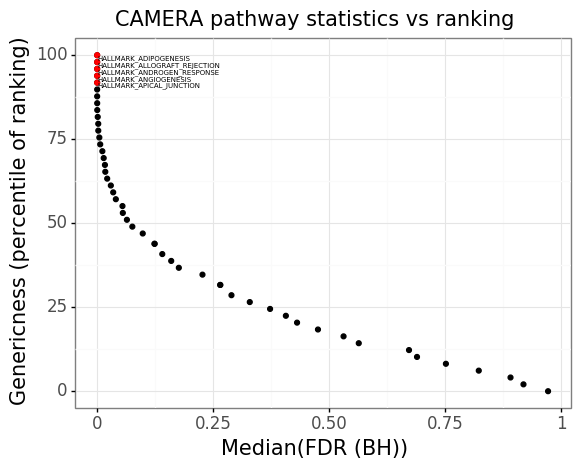

<ggplot: (8753558516981)>


In [14]:
plot_significance_vs_ranking(
    camera_pathway_summary,
    "CAMERA",
    "adj p-value",
    "Median(FDR (BH))", 
    "CAMERA_pathway_ranking.svg"
)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ORA_pathway_ranking.svg
  warn('Filename: {}'.format(filename))


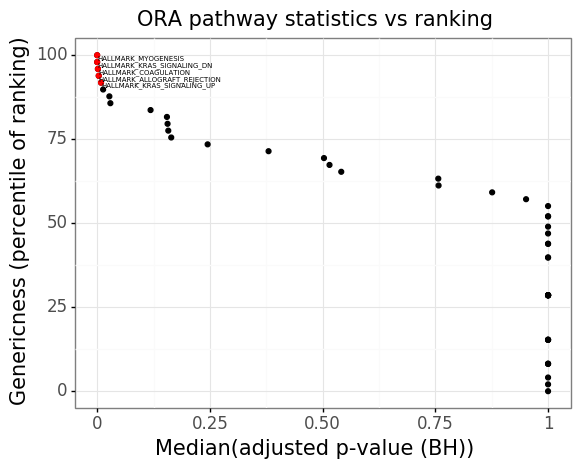

<ggplot: (8753549466181)>


In [15]:
plot_significance_vs_ranking(
    ora_pathway_summary, 
    "ORA",
    "adj p-value", 
    "Median(adjusted p-value (BH))",
    "ORA_pathway_ranking.svg"
)

**Takeaway:**
* Here are the results demonstrating that different enrichment methods can easily be plugged into our simulation workflow to identify generic gene sets
* Depending on the enrichment method, generic gene sets will vary slightly due to the different assumptions and modeling procedures. More details about the methods can be found in the [previous notebook](2_apply_enrichment_method.ipynb)

## Compare pathway ranking across enrichment methods

In [16]:
# define plotting function
def plot_paired_ranking(method1_summary_df, method2_summary_df, method1_name, method2_name, output_figure_filename):
    # Join dataframes to make sure the rows are aligned
    merged_summary_df = method1_summary_df.merge(
        method2_summary_df,
        left_index=True, 
        right_index=True,
        suffixes=[f"_{method1_name}", f"_{method2_name}"]
    )
        
    # Format input dataframe
    plot_df = pd.DataFrame(
        data={"Method1 ranking": merged_summary_df[f"Percentile (simulated)_{method1_name}"].values,
          "Method2 ranking": merged_summary_df[f"Percentile (simulated)_{method2_name}"].values
         },
        index=merged_summary_df.index
    )
    fig = pn.ggplot(plot_df, pn.aes(x='Method1 ranking', y='Method2 ranking'))
    fig += pn.geom_point()
    fig += pn.labs(x = f"{method1_name} pathway ranking",
                y = f"{method2_name} pathway ranking",
                title = f'{method1_name} vs {method2_name} pathway ranking')
    fig += pn.theme_bw()
    fig += pn.theme(
        legend_title_align = "center",
        plot_background=pn.element_rect(fill='white'),
        legend_key=pn.element_rect(fill='white', colour='white'), 
        legend_title=pn.element_text(family='sans-serif', size=15),
        legend_text=pn.element_text(family='sans-serif', size=12),
        plot_title=pn.element_text(family='sans-serif', size=15),
        axis_text=pn.element_text(family='sans-serif', size=12),
        axis_title=pn.element_text(family='sans-serif', size=15)
        )
    
    # Save figure
    fig.save(
        output_figure_filename,
        format="svg",
        bbox_inches="tight",
        transparent=True,
        pad_inches=0,
        dpi=300,
    )
    print(fig)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: gsea_gsva_compare_ranking.svg
  warn('Filename: {}'.format(filename))


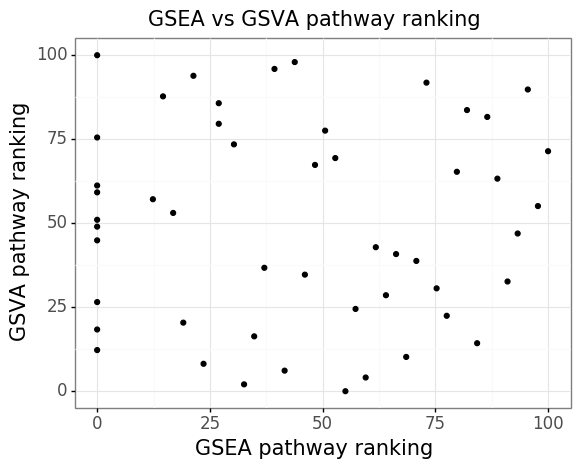

<ggplot: (8753549336181)>


In [17]:
plot_paired_ranking(
    gsea_pathway_summary,
    gsva_pathway_summary,
    "GSEA",
    "GSVA",
    "gsea_gsva_compare_ranking.svg"
    )

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: gsea_camera_compare_ranking.svg
  warn('Filename: {}'.format(filename))


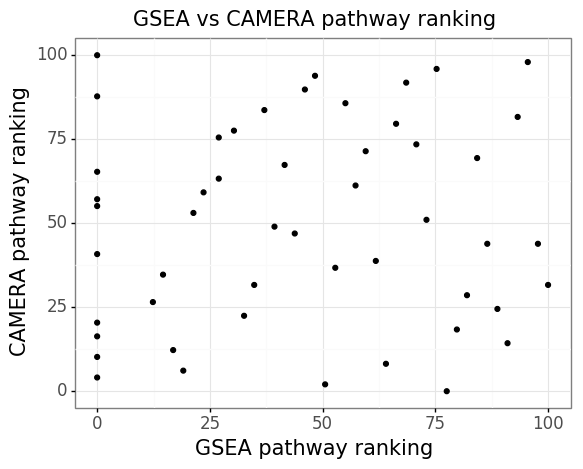

<ggplot: (8753549379093)>


In [18]:
plot_paired_ranking(
    gsea_pathway_summary,
    camera_pathway_summary,
    "GSEA",
    "CAMERA",
    "gsea_camera_compare_ranking.svg"
    )

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: gsea_ora_compare_ranking.svg
  warn('Filename: {}'.format(filename))


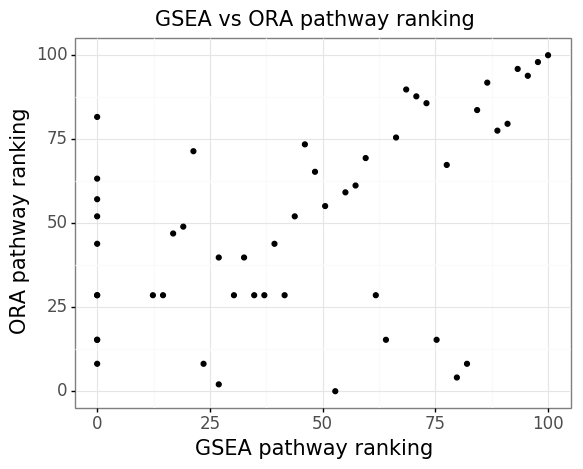

<ggplot: (8753549441217)>


In [19]:
plot_paired_ranking(
    gsea_pathway_summary,
    ora_pathway_summary,
    "GSEA",
    "ORA",
    "gsea_ora_compare_ranking.svg"
    )

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: gsva_camera_compare_ranking.svg
  warn('Filename: {}'.format(filename))


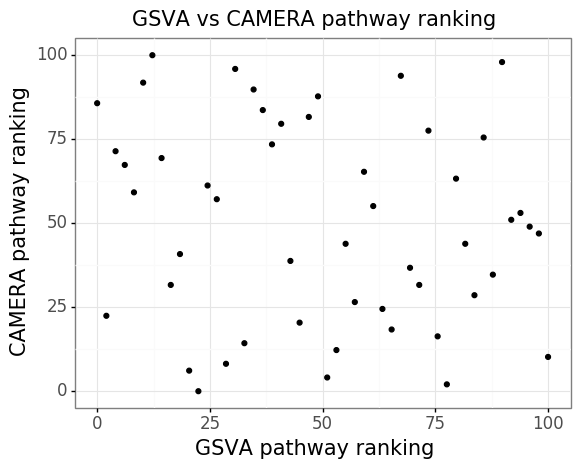

<ggplot: (8753549188549)>


In [20]:
plot_paired_ranking(
    gsva_pathway_summary,
    camera_pathway_summary,
    "GSVA",
    "CAMERA",
    "gsva_camera_compare_ranking.svg"
    )

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: gsva_ora_compare_ranking.svg
  warn('Filename: {}'.format(filename))


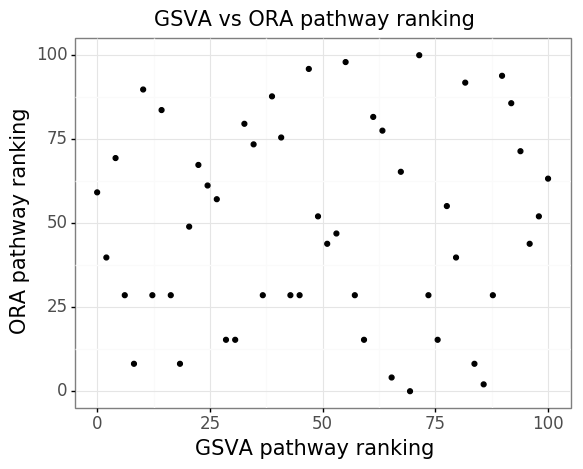

<ggplot: (8753549151945)>


In [21]:
plot_paired_ranking(
    gsva_pathway_summary,
    ora_pathway_summary,
    "GSVA",
    "ORA",
    "gsva_ora_compare_ranking.svg"
    )

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: camera_ora_compare_ranking.svg
  warn('Filename: {}'.format(filename))


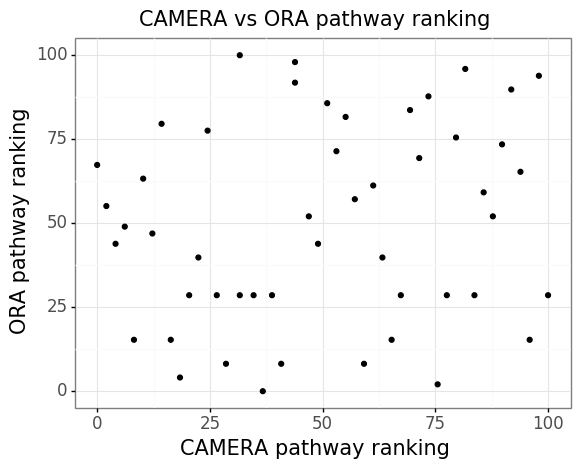

<ggplot: (8753549388441)>


In [22]:
plot_paired_ranking(
    camera_pathway_summary,
    ora_pathway_summary,
    "CAMERA",
    "ORA",
    "camera_ora_compare_ranking.svg"
    )

## Assemble plots into figure


In [23]:
def make_figure_panel(filename, scale_x_input, scale_y_input, x_loc, y_loc):
    panel = (
        sg.fromfile(filename)
    )
    
    panel_size = (
        np.round(float(panel.root.attrib['width'][:-2])*1.33, 0), 
        np.round(float(panel.root.attrib['height'][:-2])*1.33, 0)
    )

    scale_x = scale_x_input
    scale_y = scale_y_input

    print(f"original: {panel_size}")
    print(f"scaled:{(panel_size[0]*scale_x,panel_size[1]*scale_y)}")

    panel = panel.getroot()
    panel.scale_xy(x=scale_x, y=scale_y)
    panel.moveto(x_loc, y_loc)
    
    return panel

In [24]:
# Create diagonal panels
panel_11 = make_figure_panel(
    "GSEA_pathway_ranking.svg",
    scale_x_input=0.5, 
    scale_y_input=0.5,
    x_loc=10,
    y_loc=10
)
panel_22 = make_figure_panel(
    "GSVA_pathway_ranking.svg",
    scale_x_input=0.5,
    scale_y_input=0.5,
    x_loc=200,
    y_loc=200
)
panel_33 = make_figure_panel(
    "CAMERA_pathway_ranking.svg",
    scale_x_input=0.5,
    scale_y_input=0.5,
    x_loc=400,
    y_loc=400
)
panel_44 = make_figure_panel(
    "ORA_pathway_ranking.svg",
    scale_x_input=0.5,
    scale_y_input=0.5,
    x_loc=600,
    y_loc=600
)

original: (541.0, 428.0)
scaled:(270.5, 214.0)
original: (541.0, 428.0)
scaled:(270.5, 214.0)
original: (541.0, 428.0)
scaled:(270.5, 214.0)
original: (541.0, 428.0)
scaled:(270.5, 214.0)


In [25]:
# Create off-diagonal panels
panel_21 = make_figure_panel(
    "gsea_gsva_compare_ranking.svg",
    scale_x_input=0.5, 
    scale_y_input=0.5,
    x_loc=10,
    y_loc=200
)
panel_31 = make_figure_panel(
    "gsea_camera_compare_ranking.svg",
    scale_x_input=0.5,
    scale_y_input=0.5,
    x_loc=10,
    y_loc=400
)
panel_41 = make_figure_panel(
    "gsea_ora_compare_ranking.svg",
    scale_x_input=0.5,
    scale_y_input=0.5,
    x_loc=10,
    y_loc=600
)
panel_23 = make_figure_panel(
    "gsva_camera_compare_ranking.svg",
    scale_x_input=0.5,
    scale_y_input=0.5,
    x_loc=200,
    y_loc=400
)
panel_24 = make_figure_panel(
    "gsva_ora_compare_ranking.svg",
    scale_x_input=0.5,
    scale_y_input=0.5,
    x_loc=200,
    y_loc=600
)
panel_34 = make_figure_panel(
    "camera_ora_compare_ranking.svg",
    scale_x_input=0.5,
    scale_y_input=0.5,
    x_loc=400,
    y_loc=600
)

original: (541.0, 428.0)
scaled:(270.5, 214.0)
original: (541.0, 428.0)
scaled:(270.5, 214.0)
original: (541.0, 428.0)
scaled:(270.5, 214.0)
original: (541.0, 428.0)
scaled:(270.5, 214.0)
original: (541.0, 428.0)
scaled:(270.5, 214.0)
original: (541.0, 428.0)
scaled:(270.5, 214.0)


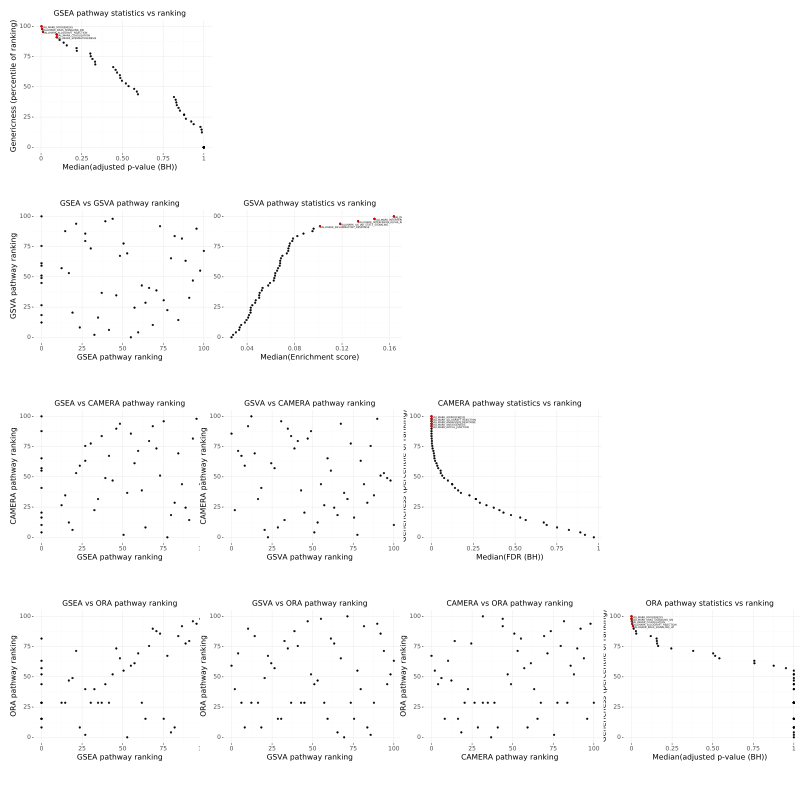

In [26]:
figure_1 = sg.SVGFigure("800", "800")
figure_1.append([
    etree.Element("rect", {"width":"100%", "height":"100%", "fill":"white"}),
    panel_11, 
    panel_22,
    panel_33,
    panel_44,
    panel_21,
    panel_31,
    panel_41,
    panel_23,
    panel_24,
    panel_34
])
display(SVG(figure_1.to_str()))

In [27]:
## save generated SVG files
figure_1.save("enrichment_paired_plot.svg")